In [ ]:
import numpy as np
import sympy as sy

In [ ]:
def W_matrix(N):
  W = np.empty(shape=(N, N))
  for i in range(N):
    w_i = np.random.random(size=N)
    w_i /= w_i.sum()
    W[i] = w_i
  return W
  

In [ ]:
N = 2
z = np.random.normal(size=N) #mean=0 and sigma=1
e = np.log(np.abs(z))
e_sy = sy.Matrix(e)
a = sy.symbols('a', real=True)

W = W_matrix(N)
W_sy = sy.Matrix(W) 

S = np.identity(N) - (1-a)*W_sy
S_inv = S**-1

log_P = S_inv*e_sy
v = a/N*sy.Matrix(np.ones(N)).T*S_inv
log_h = v @ e_sy

a_h = log_h*a

In [ ]:
f_j = 0
for j in range(N):
  f_j += W[0][j]*log_P[j] - W[0][j]*sy.log(W[0][j])

f = a*e_sy[0] + a*sy.log(a) + (1-a)*sy.log(1-a)+ log_P[0]- a_h[0] - (1-a)*f_j

func = sy.lambdify(a, f, 'numpy')

interval = np.linspace(0, 1, num=10000000) #интервал альф от 0 до 1
f_int = func(interval)

indices = np.where(np.round(f_int, 6) == 0)[0]
alfa = interval[indices[0]]
f_final = f_int[indices[0]]

<string>:2: RuntimeWarning: invalid value encountered in true_divide
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: invalid value encountered in multiply
<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in add


In [ ]:
a = alfa

S = np.identity(N) - (1-a)*W_sy
S_inv = S**-1

log_P = S_inv*e_sy
v=a/N*sy.Matrix(np.ones(N)).T*S_inv
log_h = v @ e_sy

a_h = log_h*a

In [ ]:
a

0.9181705918170592

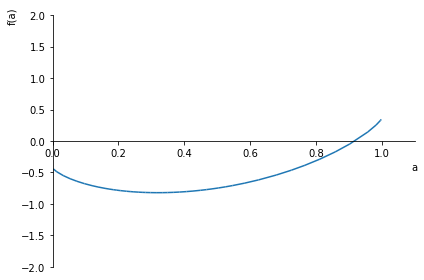

In [ ]:
sy.plot(f, ylim=(-2, 2), xlim=(0, 1.1))

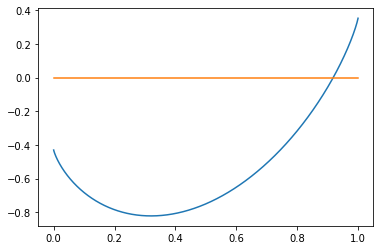

In [ ]:
import matplotlib.pyplot as plt

plt.plot(interval, f_int)
plt.plot([0,0])

In [ ]:
log_p = np.array(log_P).flatten()

P = [sy.exp(i) for i in log_p]
P = np.array(P)
P

h = [sy.exp(i) for i in log_h]
h = np.array(h)
h

array([1.07195646636308], dtype=object)

In [ ]:
def x_from_delta(delta):
  x = []
  for i in range(N):
    x_i = sy.symbols('x_{0}'.format(i), real=True)
    x.append(x_i)

  X_matrix = []
  for i in range(N):
    X_i = []
    for j in range(N):
      X_ij = (1-a)*P[i]*W[i][j]*x[i]/P[j]
      X_i.append(X_ij)
    X_matrix.append(X_i)
  X_matrix = np.array(X_matrix)
  
  p_p = np.prod(P) #перемножение цен 
  C = []
  for i in range(N):
    c_i = h[0]/(2*P[i])+(h[0]*sy.log(2*p_p)-h[0]*P[i]*sy.log(p_p))*delta/(4*P[i]**2)
    C.append(c_i)

  system = []
  for i in range(N):
    eq_i = C[i] + sum(X_matrix.T[i]) - x[i]
    system.append(eq_i)

  solution = sy.linsolve(system, x)
  x_final = solution.args[0]
  return x_final  

In [ ]:
delta = np.random.uniform(low=-0.0001, high=0.0001)
x_fin = x_from_delta(delta) 
x_fin

(0.491021202671013, 0.595202815139306)

In [ ]:
#если нужно посмотреть зависимость от неизвестной дельты
d = sy.Symbol('delta')
x_d = x_from_delta(d)
x_d

(0.13338339250668*delta + 0.49103062943695, 0.221768282326382*delta + 0.595218488437536)

In [ ]:
sum_p_j_x = 0
for j in range(N):
  sum_p_j_x += P[j]*x_fin[j]

V_delta = []
for i in range(N):
  v_i = P[i]*x_fin[i]/(sum_p_j_x - P[i]*x_fin[i])
  V_delta.append(v_i)
V_delta

[1.09695889562570, 0.911611186150784]